<a href="https://colab.research.google.com/github/RichardCanchon29/BIT_IA_Bootcamp/blob/main/de_S1_Clase_4_EDA_MARKETING.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# **EDA** EXPLORATORY DATA ANALYSIS (ANALISIS EXPLORATORIO DE DATOS)
*   AcceptedCmp1: 1 if customer accepted the offer in the 1st
campaign, 0 otherwise.
*   AcceptedCmp2: 1 if customer accepted the offer in the 2nd campaign, 0 otherwise.
*   AcceptedCmp3: 1 if customer accepted the offer in the 3rd campaign, 0 otherwise.
*   AcceptedCmp4: 1 if customer accepted the offer in the 4th campaign, 0 otherwise.
*  AcceptedCmp5: 1 if customer accepted the offer in the 5th campaign, 0 otherwise.
*   Response (target): 1 if customer accepted the offer in the last campaign, 0 otherwise.
*  Complain: 1 if customer complained in the last 2 years.
DtCustomer: Date of customer’s enrollment with the company.
Education: Customer’s level of education.
Marital: Customer’s marital status.
Kidhome: Number of small children in customer’s household.
Teenhome: Number of teenagers in customer’s household.
Income: Customer’s yearly household income.
MntFishProducts: Amount spent on fish products in the last 2 years.
MntMeatProducts: Amount spent on meat products in the last 2 years.
MntFruits: Amount spent on fruit products in the last 2 years.
MntSweetProducts: Amount spent on sweet products in the last 2 years.
MntWines: Amount spent on wine products in the last 2 years.
MntGoldProds: Amount spent on gold products in the last 2 years.
NumDealsPurchases: Number of purchases made with a discount.
NumCatalogPurchases: Number of purchases made using a catalog.
NumStorePurchases: Number of purchases made directly in stores.
NumWebPurchases: Number of purchases made through the company’s website.
NumWebVisitsMonth: Number of visits to the company’s website in the last month.
Recency: Number of days since the last purchase.

In [1]:
import pandas as pd #Para el manejo de los datos
import numpy as np #Para manejo de operaciones entre datos y columnas
import matplotlib.pyplot as plt #Para graficos
import seaborn as sns #Para graficos

In [5]:
df = pd.read_excel('/content/marketing_campaign.xlsx')
# para .csv pd.read_csv o si es excel pd.read_xlsx content/marketing_campaign.xlsx

In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2240 entries, 0 to 2239
Data columns (total 29 columns):
 #   Column               Non-Null Count  Dtype         
---  ------               --------------  -----         
 0   ID                   2240 non-null   int64         
 1   Year_Birth           2240 non-null   int64         
 2   Education            2240 non-null   object        
 3   Marital_Status       2240 non-null   object        
 4   Income               2216 non-null   float64       
 5   Kidhome              2240 non-null   int64         
 6   Teenhome             2240 non-null   int64         
 7   Dt_Customer          2240 non-null   datetime64[ns]
 8   Recency              2240 non-null   int64         
 9   MntWines             2240 non-null   int64         
 10  MntFruits            2240 non-null   int64         
 11  MntMeatProducts      2240 non-null   int64         
 12  MntFishProducts      2240 non-null   int64         
 13  MntSweetProducts     2240 non-nul

In [6]:
#Describeme entrega un resumen solo de los atributos numericos
# count = numero de registros
# mean = promedio
# Std = desviasion

df.describe()

,ID,Year_Birth,Income,Kidhome,Teenhome,Dt_Customer,Recency,MntWines,MntFruits,MntMeatProducts,...,NumWebVisitsMonth,AcceptedCmp3,AcceptedCmp4,AcceptedCmp5,AcceptedCmp1,AcceptedCmp2,Complain,Z_CostContact,Z_Revenue,Response
count,2240.000000,2240.000000,2216.000000,2240.000000,2240.000000,2240,2240.000000,2240.000000,2240.000000,2240.000000,...,2240.000000,2240.000000,2240.000000,2240.000000,2240.000000,2240.000000,2240.000000,2240.0,2240.0,2240.000000
mean,5592.159821,1968.805804,52247.251354,0.444196,0.506250,2013-07-10 10:01:42.857142784,49.109375,303.935714,26.302232,166.950000,...,5.316518,0.072768,0.074554,0.072768,0.064286,0.013393,0.009375,3.0,11.0,0.149107
min,0.000000,1893.000000,1730.000000,0.000000,0.000000,2012-07-30 00:00:00,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,3.0,11.0,0.000000
25%,2828.250000,1959.000000,35303.000000,0.000000,0.000000,2013-01-16 00:00:00,24.000000,23.750000,1.000000,16.000000,...,3.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,3.0,11.0,0.000000
50%,5458.500000,1970.000000,51381.500000,0.000000,0.000000,2013-07-08 12:00:00,49.000000,173.500000,8.000000,67.000000,...,6.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,3.0,11.0,0.000000
75%,8427.750000,1977.000000,68522.000000,1.000000,1.000000,2013-12-30 06:00:00,74.000000,504.250000,33.000000,232.000000,...,7.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,3.0,11.0,0.000000
max,11191.000000,1996.000000,666666.000000,2.000000,2.000000,2014-06-29 00:00:00,99.000000,1493.000000,199.000000,1725.000000,...,20.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,3.0,11.0,1.000000
std,3246.662198,11.984069,25173.076661,0.538398,0.544538,NaN,28.962453,336.597393,39.773434,225.715373,...,2.426645,0.259813,0.262728,0.259813,0.245316,0.114976,0.096391,0.0,0.0,0.356274


In [7]:
# que tamaño tiene el data set
df.shape

(2240, 29)

In [9]:
# que tipo de etiquetas de educacion?
print(df['Education'].unique())

##Observacion: hay 5 categorias en educaciones

['Graduation' 'PhD' 'Master' 'Basic' '2n Cycle']


In [10]:
# que tipo relacion sentimental tiene
print(df['Marital_Status'].unique())
## Obv: Tiene 8 categorias de status sentimental
## YOLO: You Only Live Once

['Single' 'Together' 'Married' 'Divorced' 'Widow' 'Alone' 'Absurd' 'YOLO']


In [16]:
# que edad tienen los clientes ??
# obv:Tengo el atributo año de naciemiento (Year_Birth)
# año_actual o current_year

from datetime import date
current_year = date.today().year
print(current_year)

df['Age'] = current_year - df['Year_Birth']

2024


In [17]:
df.shape

(2240, 30)

In [18]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2240 entries, 0 to 2239
Data columns (total 30 columns):
 #   Column               Non-Null Count  Dtype         
---  ------               --------------  -----         
 0   ID                   2240 non-null   int64         
 1   Year_Birth           2240 non-null   int64         
 2   Education            2240 non-null   object        
 3   Marital_Status       2240 non-null   object        
 4   Income               2216 non-null   float64       
 5   Kidhome              2240 non-null   int64         
 6   Teenhome             2240 non-null   int64         
 7   Dt_Customer          2240 non-null   datetime64[ns]
 8   Recency              2240 non-null   int64         
 9   MntWines             2240 non-null   int64         
 10  MntFruits            2240 non-null   int64         
 11  MntMeatProducts      2240 non-null   int64         
 12  MntFishProducts      2240 non-null   int64         
 13  MntSweetProducts     2240 non-nul

<Axes: >

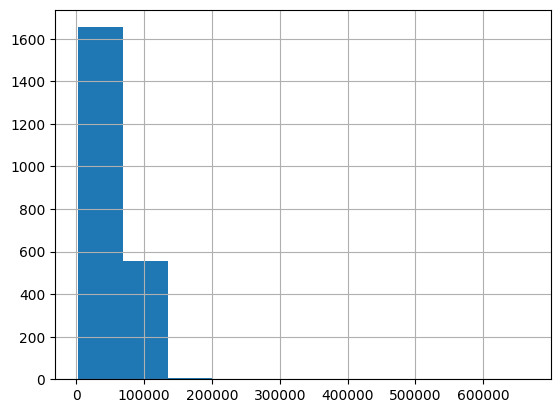

In [20]:
df['Income'].hist()

<Axes: title={'center': 'Income'}, xlabel='Education'>

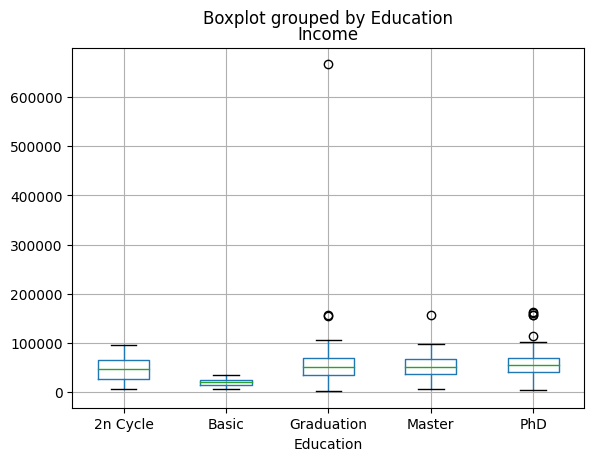

In [23]:
df.boxplot(column="Income", by="Education")

<Axes: title={'center': 'Income'}, xlabel='Teenhome'>

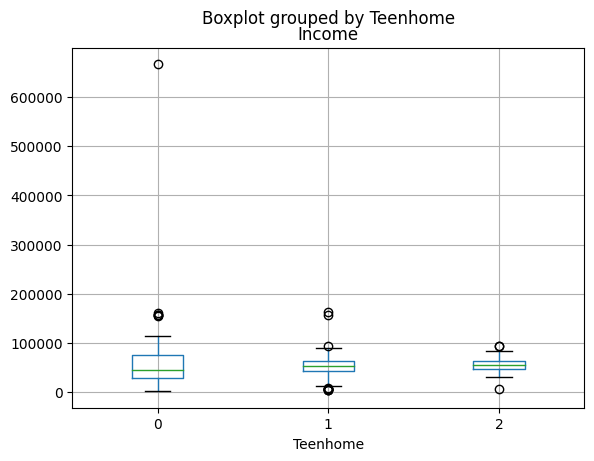

In [29]:
df.boxplot(column="Income", by="Teenhome")

<Axes: title={'center': 'Income'}, xlabel='Marital_Status'>

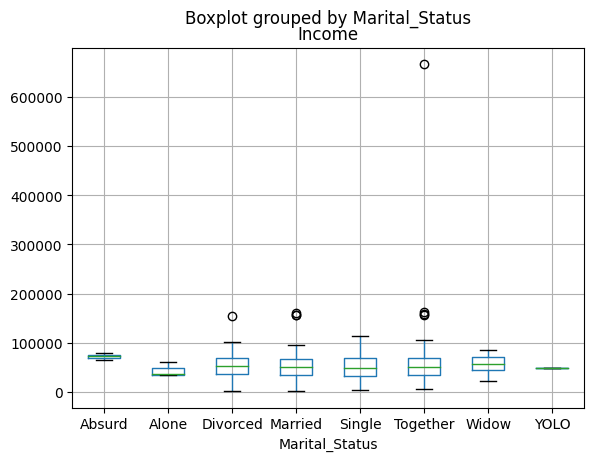

In [26]:
df.boxplot(column="Income", by="Marital_Status")

## Analisis:
- el Estado Sentimental de menor ingresos son los YOLO
- En promedio Divorsiados, casados, solteros, y divorciados tienen ingrsos promedios a 150 mil UDS al año

<Axes: title={'center': 'Income'}, xlabel='Kidhome'>

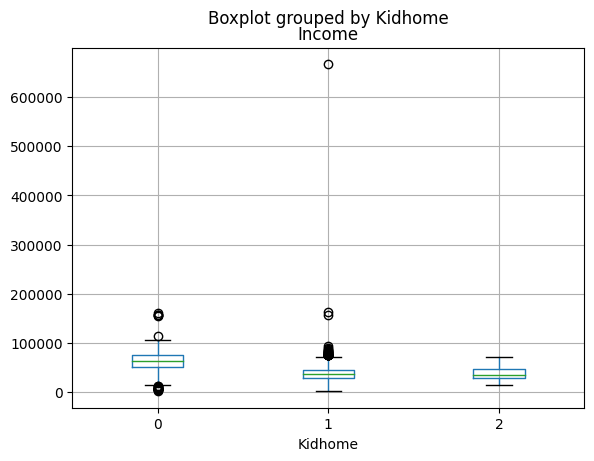

In [28]:
df.boxplot(column="Income", by="Kidhome")

In [31]:
media_salario = df['Income'].mean()
print(f"Media de salario: {media_salario}")

Media de salario: 52247.25135379061


In [32]:
resumen = df.describe()
print(resumen)

                 ID   Year_Birth         Income      Kidhome     Teenhome  \
count   2240.000000  2240.000000    2216.000000  2240.000000  2240.000000   
mean    5592.159821  1968.805804   52247.251354     0.444196     0.506250   
min        0.000000  1893.000000    1730.000000     0.000000     0.000000   
25%     2828.250000  1959.000000   35303.000000     0.000000     0.000000   
50%     5458.500000  1970.000000   51381.500000     0.000000     0.000000   
75%     8427.750000  1977.000000   68522.000000     1.000000     1.000000   
max    11191.000000  1996.000000  666666.000000     2.000000     2.000000   
std     3246.662198    11.984069   25173.076661     0.538398     0.544538   

                         Dt_Customer      Recency     MntWines    MntFruits  \
count                           2240  2240.000000  2240.000000  2240.000000   
mean   2013-07-10 10:01:42.857142784    49.109375   303.935714    26.302232   
min              2012-07-30 00:00:00     0.000000     0.000000     0.

<Axes: title={'center': 'Income'}, xlabel='Age'>

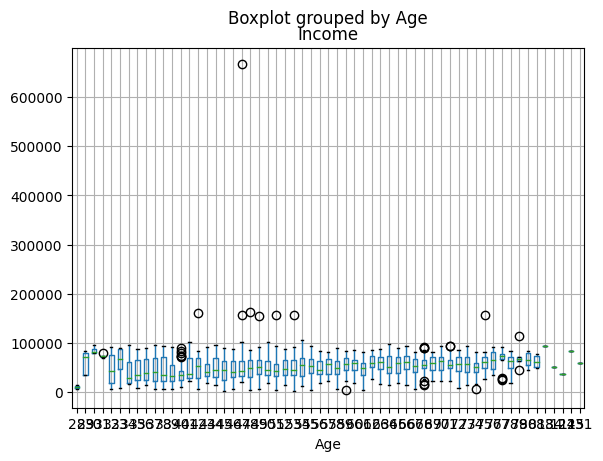

In [36]:
df.boxplot(column="Income", by="Age")

In [41]:
df['Age_Group'] = df['Age'].apply(lambda x: 'Children' if x <= 16
                                  else('Youth' if 17 <= x <= 30
                                  else ('Middle Aged' if 30 < x <=  45
                                  else 'Old'    )
))

In [43]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2240 entries, 0 to 2239
Data columns (total 31 columns):
 #   Column               Non-Null Count  Dtype         
---  ------               --------------  -----         
 0   ID                   2240 non-null   int64         
 1   Year_Birth           2240 non-null   int64         
 2   Education            2240 non-null   object        
 3   Marital_Status       2240 non-null   object        
 4   Income               2216 non-null   float64       
 5   Kidhome              2240 non-null   int64         
 6   Teenhome             2240 non-null   int64         
 7   Dt_Customer          2240 non-null   datetime64[ns]
 8   Recency              2240 non-null   int64         
 9   MntWines             2240 non-null   int64         
 10  MntFruits            2240 non-null   int64         
 11  MntMeatProducts      2240 non-null   int64         
 12  MntFishProducts      2240 non-null   int64         
 13  MntSweetProducts     2240 non-nul

<Axes: title={'center': 'Income'}, xlabel='Age_Group'>

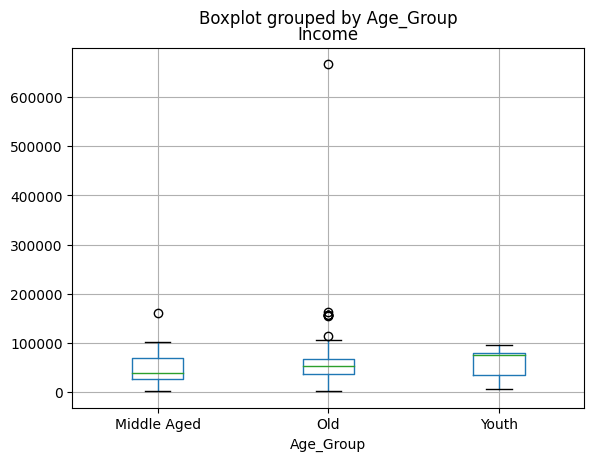

In [45]:
df.boxplot(column="Income", by="Age_Group")

<Axes: title={'center': 'Kidhome'}, xlabel='Age_Group'>

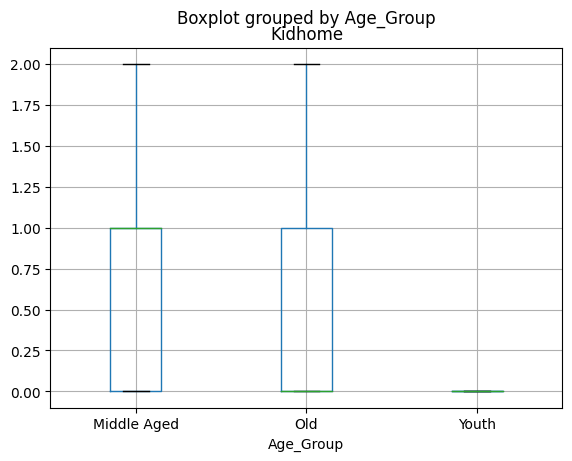

In [46]:
df.boxplot(column="Kidhome", by="Age_Group")

<Axes: title={'center': 'Teenhome'}, xlabel='Age_Group'>

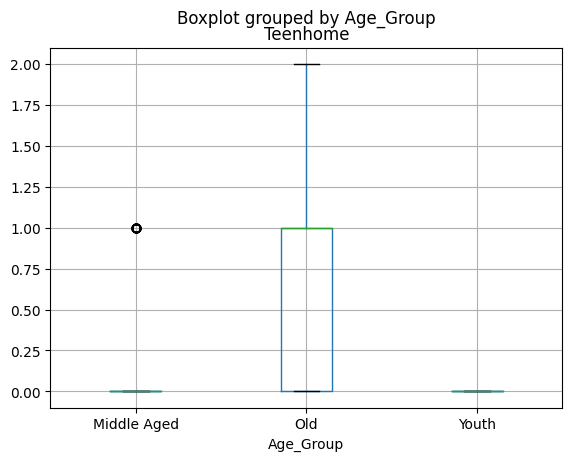

In [47]:
df.boxplot(column="Teenhome", by="Age_Group")

In [50]:
df['Total_de_Compras'] = (df['MntFruits'] + df['MntWines'] + df['MntMeatProducts'] + df['MntFishProducts'] + df['MntSweetProducts'] + df['MntGoldProds'])

In [52]:
df[['Total_de_Compras','MntWines','MntFruits','MntMeatProducts','MntFishProducts','MntSweetProducts','MntGoldProds']]

,Total_de_Compras,MntWines,MntFruits,MntMeatProducts,MntFishProducts,MntSweetProducts,MntGoldProds
0,1617,635,88,546,172,88,88
1,27,11,1,6,2,1,6
2,776,426,49,127,111,21,42
3,53,11,4,20,10,3,5
4,422,173,43,118,46,27,15
...,...,...,...,...,...,...,...
2235,1341,709,43,182,42,118,247
2236,444,406,0,30,0,0,8
2237,1241,908,48,217,32,12,24
2238,843,428,30,214,80,30,61


<Axes: title={'center': 'Total_de_Compras'}, xlabel='Age_Group'>

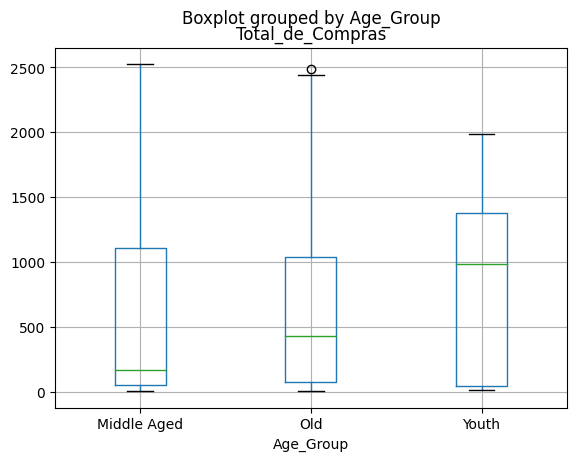

In [53]:
df.boxplot(column="Total_de_Compras", by="Age_Group")

<Axes: title={'center': 'Total_de_Compras'}, xlabel='Education'>

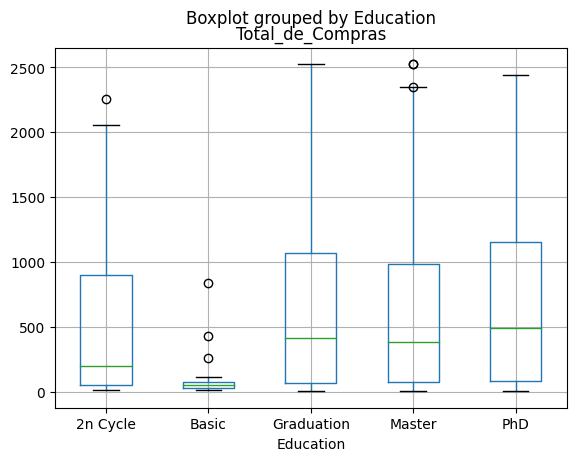

In [54]:
df.boxplot(column="Total_de_Compras", by="Education")

<Axes: title={'center': 'MntSweetProducts'}, xlabel='Education'>

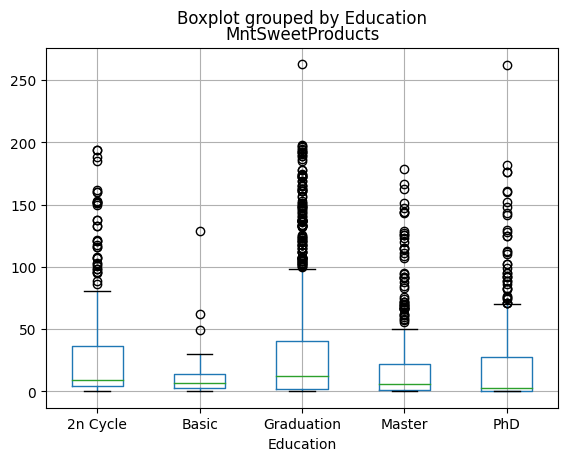

In [55]:
df.boxplot(column="MntSweetProducts", by="Education")

<Axes: title={'center': 'MntSweetProducts'}, xlabel='Age_Group'>

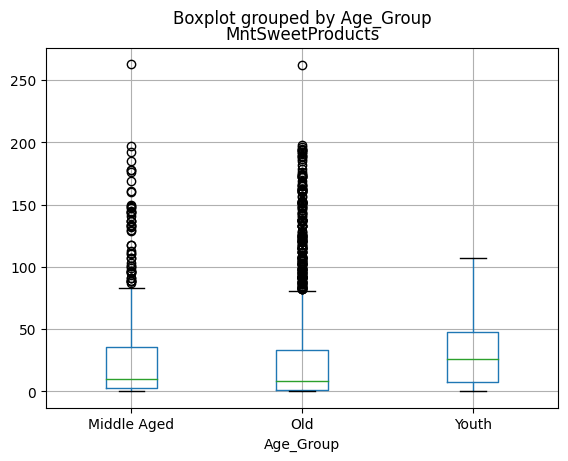

In [56]:
df.boxplot(column="MntSweetProducts", by="Age_Group")